In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
df = pd.read_csv('C:\\Users\\sapni\\Downloads\\iNeuron\\Assignments\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(df.isnull().sum())
print(df.dtypes)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [5]:
df = df[(df != '?').all(axis=1)]
df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


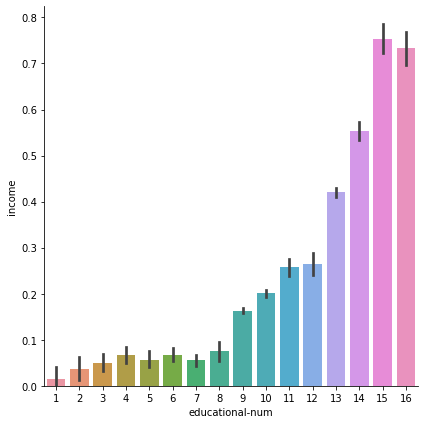

In [7]:
sns.catplot(x = 'educational-num', y = 'income', data = df, kind = 'bar', height = 6)
plt.show()

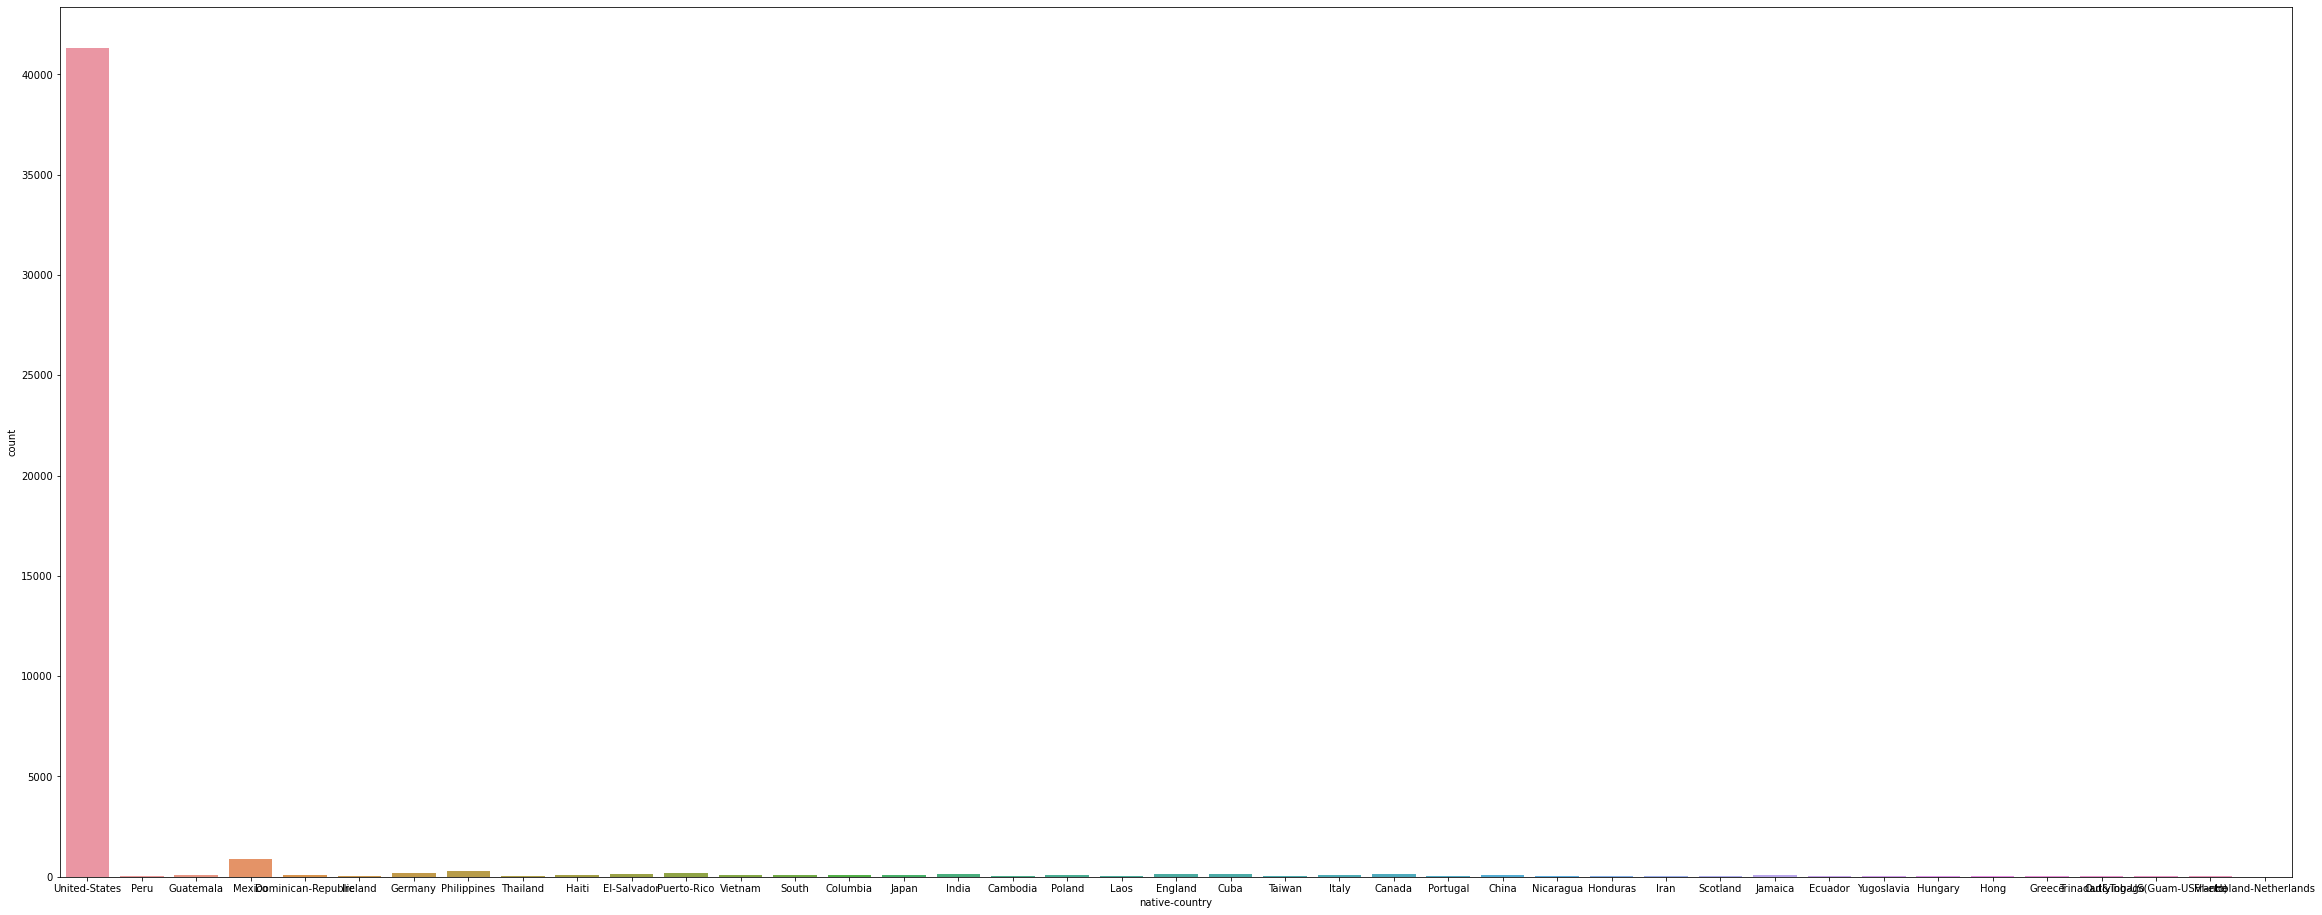

In [8]:
plt.figure(figsize=(40,16))
sns.countplot(x='native-country', data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


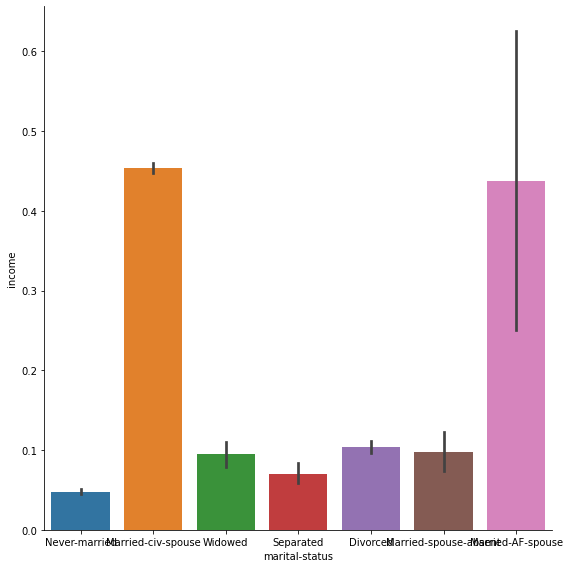

In [9]:
sns.factorplot(x='marital-status', y = 'income', data = df, kind = 'bar', height = 8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

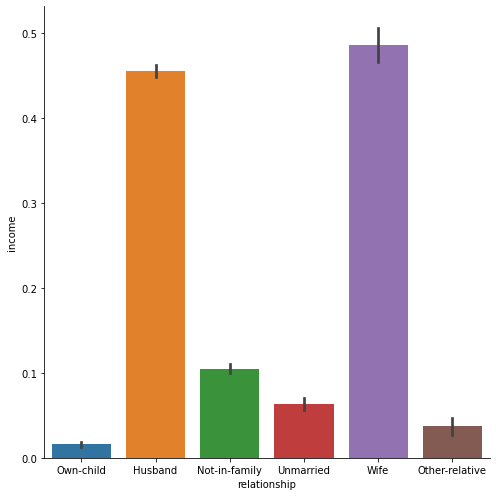

In [10]:
sns.factorplot(x='relationship', y='income', data=df, kind = 'bar', size = 7)
plt.show

In [11]:
df['marital-status']=df['marital-status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

In [12]:
for column in df:
    enc = LabelEncoder()
    if df.dtypes[column]==np.object:
        df[column] = enc.fit_transform(df[column])

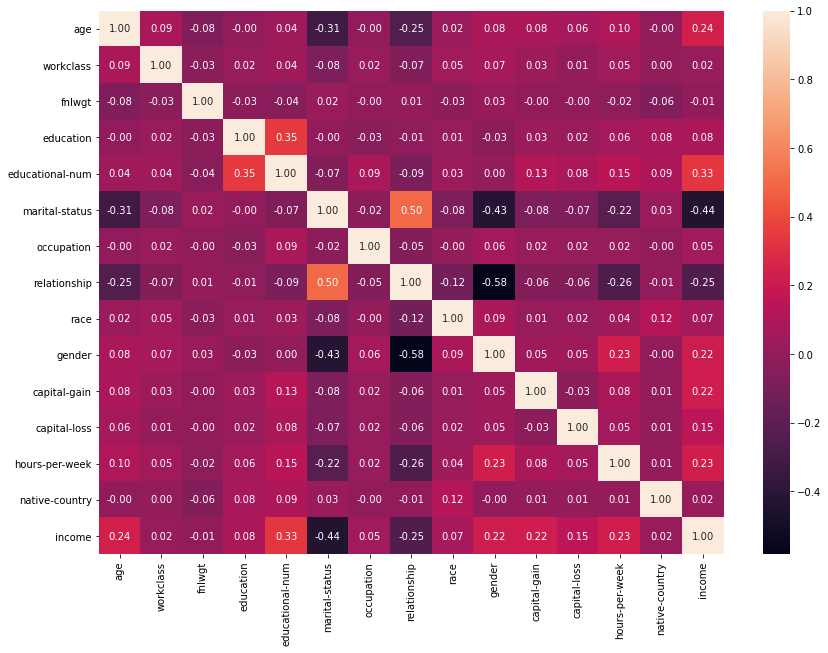

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')
plt.show()

In [14]:
df = df.drop(['relationship','education'],axis = 1)

In [15]:
df = df.drop(['occupation','fnlwgt','native-country'],axis=1)

In [16]:
print(df.head())

   age  workclass  educational-num  marital-status  race  gender  \
0   25          2                7               1     2       1   
1   38          2                9               0     4       1   
2   28          1               12               0     4       1   
3   44          2               10               0     2       1   
5   34          2                6               1     4       1   

   capital-gain  capital-loss  hours-per-week  income  
0             0             0              40       0  
1             0             0              50       0  
2             0             0              40       1  
3          7688             0              40       1  
5             0             0              30       0  


In [22]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print(X.head())
print(y.head())

   age  workclass  educational-num  marital-status  race  gender  \
0   25          2                7               1     2       1   
1   38          2                9               0     4       1   
2   28          1               12               0     4       1   
3   44          2               10               0     2       1   
5   34          2                6               1     4       1   

   capital-gain  capital-loss  hours-per-week  
0             0             0              40  
1             0             0              50  
2             0             0              40  
3          7688             0              40  
5             0             0              30  
0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64


In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

In [25]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

79.34517921914343


In [26]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

81.77439318709025


In [27]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

83.54676956635909


In [29]:
clf=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(x_train,y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=50, n_estimators=50)

In [30]:
pred = clf.predict(x_test)
pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 85.620477 


In [32]:
import xgboost as xgb

In [33]:
dmat = xgb.DMatrix(x_train,y_train)
test_dmat = xgb.DMatrix(x_test)

In [37]:
pip install scikit_optimize

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [38]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'min_child_weight': (0, 10),
        'max_depth': (0, 30),
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.5, 1.0, 'uniform'),
        'n_estimators':(50,100),
        'reg_lambda':(1,100,'log-uniform'),
        }

bayes=BayesSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',eval_metric='error',eta=0.1),search_spaces=params,n_iter=50,scoring='accuracy',cv=5)
res=bayes.fit(x_train,y_train)
print(res.best_params_)
print(res.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

OrderedDict([('colsample_bytree', 1.0), ('max_depth', 6), ('min_child_weight', 10), ('n_estimators', 100), ('reg_lambda', 1), ('subsample', 1.0)])
0.8589345831408014


In [39]:
final_p={'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 0,'subsample': 0.5,'reg_lambda': 100.0,'objective':'binary:logistic','eta': 0.1,'n_estimators':50, "silent": 1}
cv_res=xgb.cv(params=final_p,dtrain=dmat,num_boost_round=1000,early_stopping_rounds=100,metrics=['error'],nfold=5)
cv_res.tail()

[16:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to

,train-error-mean,train-error-std,test-error-mean,test-error-std
451,0.141692,0.000457,0.145686,0.002197
452,0.141833,0.000475,0.145455,0.002031
453,0.141651,0.000520,0.145059,0.001980
454,0.141651,0.000548,0.145026,0.001904
455,0.141569,0.000647,0.144828,0.002112


In [40]:
final_clf=xgb.train(params=final_p,dtrain=dmat,num_boost_round=837)
pred=final_clf.predict(test_dmat)
print(pred)
pred[pred > 0.5 ] = 1
pred[pred <= 0.5] = 0
print(pred)
print(accuracy_score(y_test,pred)*100)

[16:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[9.8706400e-01 1.7137077e-02 3.7176609e-02 ... 3.9975964e-02 5.2863982e-04
 9.8876500e-01]
[1. 0. 0. ... 0. 0. 1.]
86.45135352452425
